# Sentiment Analysis of a Twitter Ticket Trading Account

## Import libraries

In [44]:
import tweepy
import json
import requests
from requests_oauthlib import OAuth1
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

#References
#https://huggingface.co/blog/sentiment-analysis-python
#https://www.analyticsvidhya.com/blog/2022/07/sentiment-analysis-using-python/

## Set up authentication credentials

In [45]:
api_key = 'my_api_key'
api_key_secret = 'my_api_key_secret'

access_key = 'my_access_key'
access_key_token = 'my_access_key_token'

auth = OAuth1(api_key, api_key_secret, access_key, access_key_token)

## Get data

In [46]:
full_url='https://api.twitter.com/1.1/statuses/user_timeline.json?screen_name=875tickets&count=200'

r = requests.get(full_url, auth=auth)

## Initialize and test sentiment classifier

In [47]:
sentiment = SentimentIntensityAnalyzer()

text_1 = "The movie was funny and the acting was great."
text_2 =  "I didn't like the food at that restaurant."
text_3 = 'Scammer alert.'
text_4 = 'Ticket scam.'
text_5 = "I got scammed."

sent_1 = sentiment.polarity_scores(text_1)
sent_2 = sentiment.polarity_scores(text_2)
sent_3 = sentiment.polarity_scores(text_3)
sent_4 = sentiment.polarity_scores(text_4)
sent_5 = sentiment.polarity_scores(text_5)

print("Results for text 1:", sent_1)
print("Results for text 2:", sent_2)
print("Results for text 3:", sent_3)
print("Results for text 4:", sent_4)
print("Results for text 5:", sent_5)

Results for text 1: {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.7906}
Results for text 2: {'neg': 0.232, 'neu': 0.768, 'pos': 0.0, 'compound': -0.2755}
Results for text 3: {'neg': 0.0, 'neu': 0.312, 'pos': 0.688, 'compound': 0.296}
Results for text 4: {'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}
Results for text 5: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


## Classify text from individual tweets

In [48]:
# Initialize lists and counter
tweet_list = []
tweets_result = []
cnt = 0

#Loop over each tweet to classify
for tweet in r.json():
        
    tweet_list.append(tweet['text'])
    cnt = cnt + 1
    content = tweet['text']
    sent = sentiment.polarity_scores(content)
    tweets_result.append({'tweet': content, 'sentiment_data': sent, 'final_sentiment':sent['compound']})

#Uncomment next line to print data in json format
#print(json.dumps(tweets_result, indent=2))

#Use print(tweet['text']) after initializing for loop to print individual tweets

## Organize and visualize results

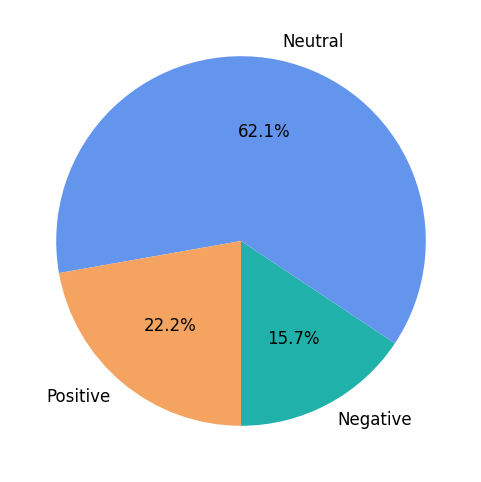

In [49]:
# Loading the data in a dataframe
df = pd.DataFrame(tweets_result)

#Extracting sentiment data and score
tweets = [x for x in df['tweet']]
sent_data = [x for x in df['sentiment_data']]
sent_final = [x for x in df['final_sentiment']]

#Initializing counters
cnt_neg = 0
cnt_neu = 0
cnt_pos = 0

#Assigning sentiment based on compound score
for i in range(len(sent_final)):
    if 'SCAMMER ALERT' in tweets[i]:
        cnt_neg = cnt_neg + 1
    elif sent_final[i] <= -0.333:
        cnt_neg = cnt_neg + 1
    elif sent_final[i] < 0.333 and sent_final[i] > -0.333:
        cnt_neu = cnt_neu + 1
    elif sent_final[i] >= 0.333:
        cnt_pos = cnt_pos + 1      

#Setting up sentiment dictionary and series
sentiment_overall = {'Negative': cnt_neg, 'Neutral': cnt_neu, 'Positive': cnt_pos}
sentiment = pd.Series(sentiment_overall)

# Visualizing the sentiments
fig = plt.figure(figsize=(6,6), dpi=100);
ax = plt.subplot(111);
sentiment.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="", colors=['lightseagreen', 'cornflowerblue', 'sandybrown']);